In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
%matplotlib notebook

In [3]:
AAS237 = pd.read_csv("AAS237.csv")
AAS238 = pd.read_csv("AAS238.csv")
AAS237

,theme,topic_num
0,dm,1
1,x,1
2,x,2
3,x,2
4,mlm,2
...,...,...
757,x,100
758,x,100
759,dm,100
760,x,100


In [4]:
key = pd.read_csv('AAS237KEY.csv',header=None,index_col=0,squeeze=True).to_dict()
key

{1: 'The Sun',
 2: 'The Solar System',
 3: 'Extrasolar Planets: Direct Imaging',
 55: 'Extrasolar Planets: Detection',
 4: 'Extrasolar Planets: Radial Velocities',
 5: 'Extrasolar Planets: Transits',
 6: 'Extrasolar Planets: Atmospheres',
 7: 'Extrasolar Planets: Formation of Planets and Protoplanetary Disks',
 8: 'Extrasolar Planets: Populations',
 9: 'Stars, Cool Dwarfs, Brown Dwarfs',
 10: 'Stellar Evolution, Stellar Populations',
 11: 'Stellar Atmospheres, Winds',
 12: 'Circumstellar Disks',
 13: 'Binary Stellar Systems',
 14: 'Pulsating Variable Stars',
 15: 'White Dwarfs',
 16: 'Neutron Stars (Pulsars, Magnetars, Pulsar Wind Nebulae)',
 17: 'Black Holes',
 18: 'Cataclysmic Variables, Novae and Symbiotic Stars',
 19: 'Supernovae',
 20: 'Planetary Nebulae, Supernova Remnants',
 21: 'Molecular Clouds, HII Regions, Interstellar Medium',
 22: 'Dust',
 23: 'Star Formation',
 24: 'Young Stellar Objects, Very Young Stars, T-Tauri Stars, H-H Objects',
 25: 'Star Associations, Star Cluster

In [7]:
class posters:
    """
    ---------------------------------------------------
    Stores information about posters
    ---------------------------------------------------
    """
    def __init__(self, theme, topic_num):
        self.theme = theme
        self.topic_num = topic_num
        self.topics = self.assign_topics()
        self.counts = self.count_poster_themes()
        self.total_posters = len(self.theme)
        self.notx = sum(list(self.counts.values())[:-1])
        
    def assign_topics(self):
        topics = []
        for t in self.topic_num:
            topics.append(key[t])  
        return topics
    
    def count_poster_themes(self):
        counts = {'dm': 0, 'mdm': 0, 'lm': 0, 'mlm': 0, 'x': 0}
        for t in self.theme:
            counts[t]+=1  
        return counts

In [8]:
aas237 = posters(AAS237['theme'],AAS237['topic_num'])
aas238 = posters(AAS238['theme'],AAS238['topic_num'])

In [9]:
aas237.total_posters

762

In [10]:
aas237.notx

487

In [11]:
aas237.counts

{'dm': 146, 'mdm': 23, 'lm': 130, 'mlm': 188, 'x': 275}

In [12]:
aas238.total_posters

254

In [13]:
aas238.notx

127

In [14]:
aas238.counts

{'dm': 35, 'mdm': 6, 'lm': 34, 'mlm': 52, 'x': 127}

In [15]:
colors = ['#E69F00','#56B4E9','#009E73','#CC79A7']

<IPython.core.display.Javascript object>


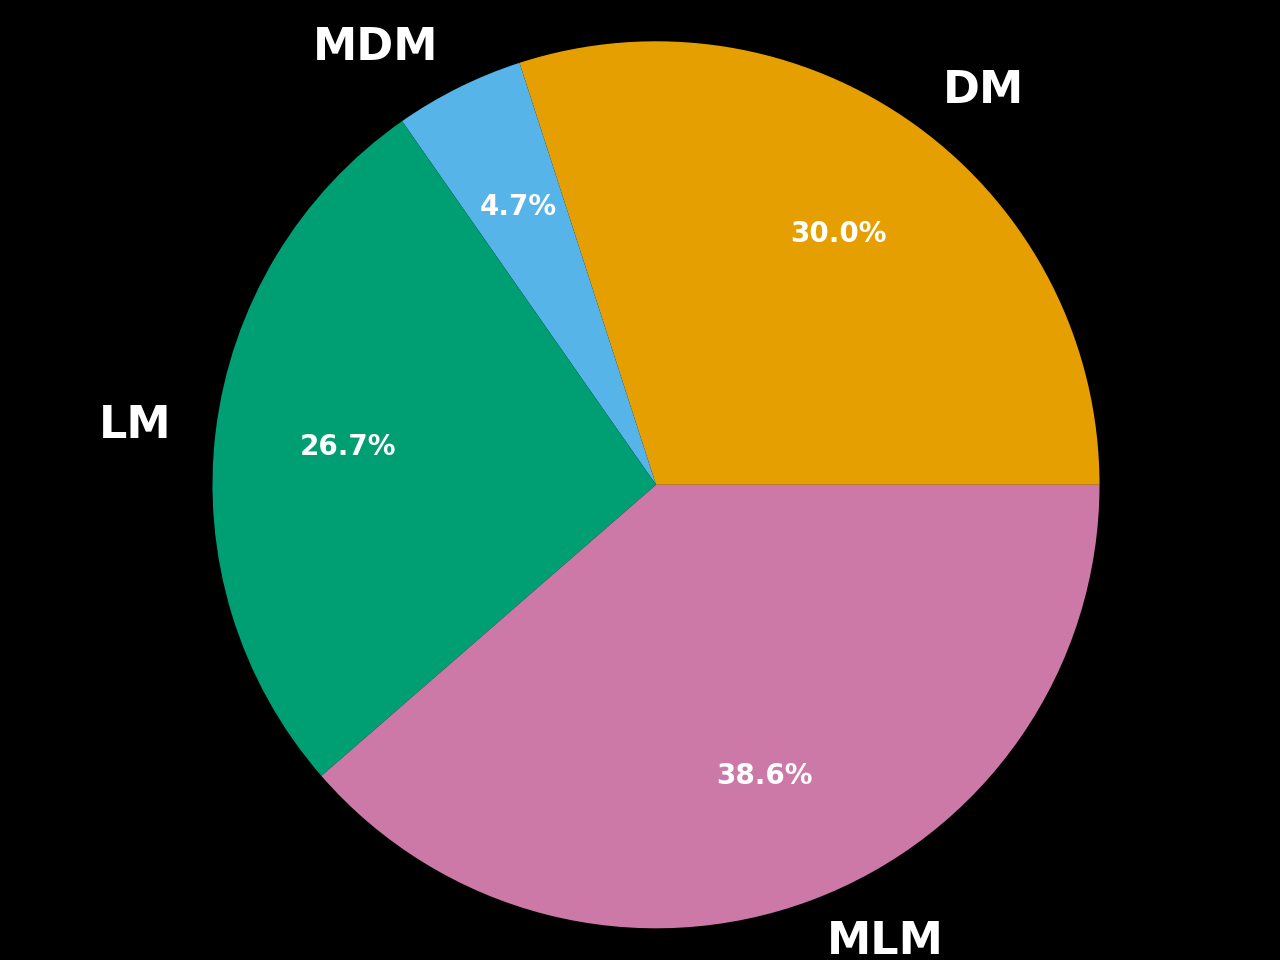

[None, None, None, None, None, None, None, None]

In [21]:
fig = plt.figure()
plt.style.use('dark_background')
patches, texts, pcts = plt.pie(list(aas237.counts.values())[:-1], 
                               labels = [l.upper() for l in list(aas237.counts.keys())[:-1]], 
                               autopct='%1.1f%%',
                               pctdistance = 0.7,
                               radius=1.5,
                               colors=colors,
                              )
plt.setp(texts,fontsize=16,fontweight='bold')
plt.setp(pcts,fontweight='bold')
# plt.savefig('AAS237_posters.pdf',transparent=True,bbox_inches='tight',dpi=300)

<IPython.core.display.Javascript object>


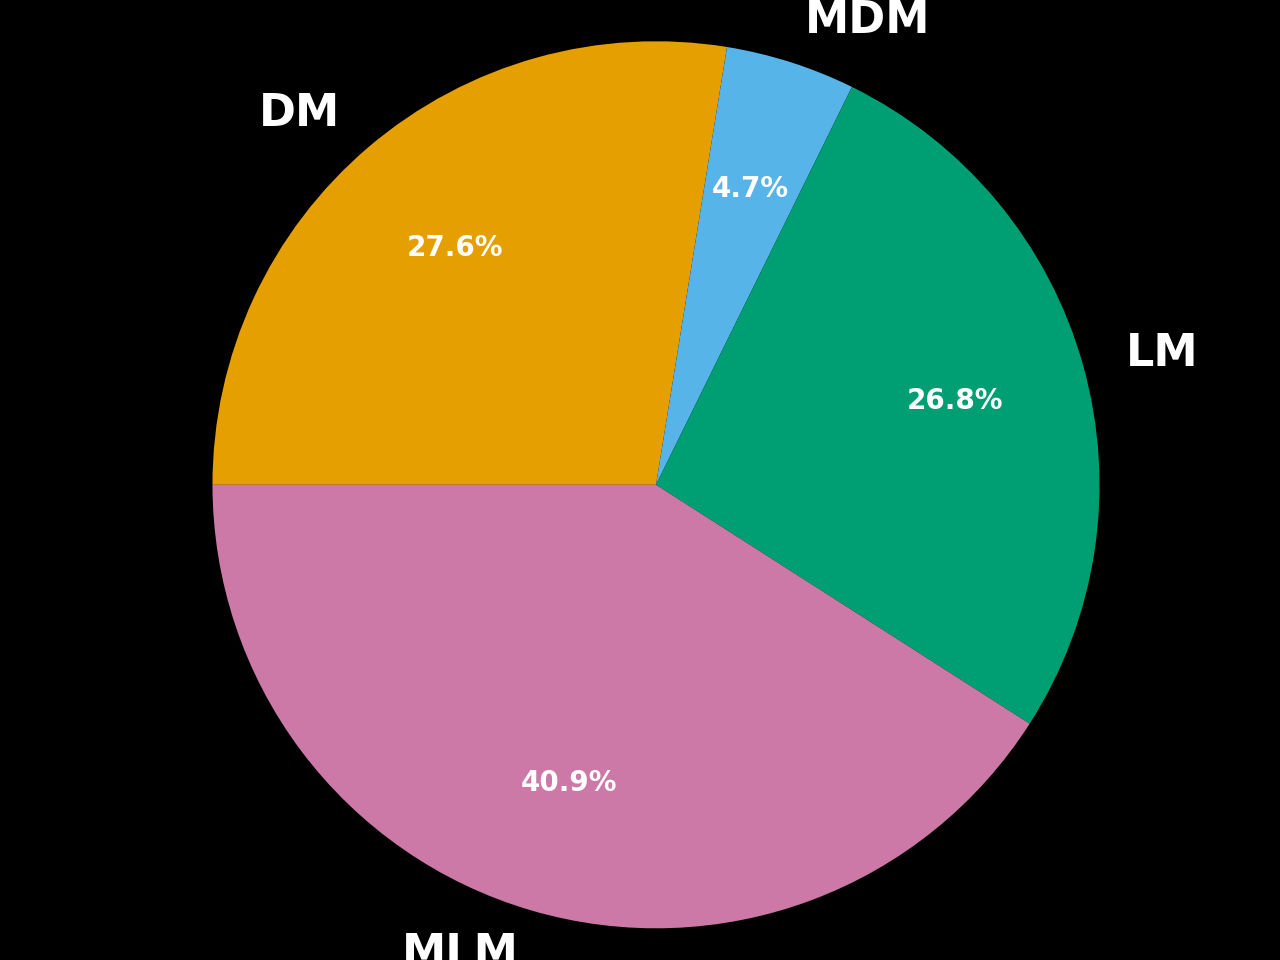

[None, None, None, None, None, None, None, None]

In [17]:
fig = plt.figure()
plt.style.use('dark_background')
patches, texts, pcts = plt.pie(list(aas238.counts.values())[:-1], 
                               labels = [l.upper() for l in list(aas238.counts.keys())[:-1]], 
                               autopct='%1.1f%%',
                               pctdistance = 0.7,
                               radius=1.5,
                               colors=colors,
                               counterclock=False,
                               startangle=180
                              )
plt.setp(texts,fontsize=16,fontweight='bold')
plt.setp(pcts,fontweight='bold')
# plt.savefig('AAS238_posters.pdf',transparent=True,bbox_inches='tight',dpi=300)

In [18]:
topics = np.array([])
DM = np.array([])
LM = np.array([])

i = 1 
while i < 56:
    dm = 0
    lm = 0
    inds237 = np.where(aas237.topic_num==i)[0]
    for ind in inds237:
        if aas237.theme[ind]=='dm' or aas237.theme[ind]=='mdm':
            dm += 1
        if aas237.theme[ind]=='lm' or aas237.theme[ind]=='mlm':
            lm += 1
    inds238 = np.where(aas238.topic_num==i)[0]
    for ind in inds238:
        if aas238.theme[ind]=='dm' or aas238.theme[ind]=='mdm':
            dm += 1
        if aas238.theme[ind]=='lm' or aas238.theme[ind]=='mlm':
            lm += 1
        
    topics = np.append(topics,key[i])
    DM = np.append(DM,dm)
    LM = np.append(LM,lm)
       
    i+=1

In [19]:
color_list = ['whitesmoke',
              'snow',
              'lightcoral',
              'mistyrose',
              'lightsalmon',
              'seashell',
              'peachpuff',
              'linen',
              'bisque',
              'antiquewhite',
              'navajowhite',
              'blanchedalmond',
              'papayawhip',
              'moccasin',
              'wheat',
              'oldlace',
              'floralwhite',
              'cornsilk',
              'lemonchiffon',
              'khaki',
              'palegoldenrod',
              'ivory',
              'beige',
              'lightyellow',
              'lightgoldenrodyellow',
              'yellow',
              'greenyellow',
              'honeydew',
              'palegreen',
              'lightgreen',
              'mintcream',
              'aquamarine',
              'azure',
              'lightcyan',
              'paleturquoise',
              'powderblue',
              'lightblue',
              'skyblue',
              'lightskyblue',
              'aliceblue',
              'lightsteelblue',
              'ghostwhite',
              'gainsboro',
              'thistle',
              'plum',
              'violet',
              'silver',
              'palevioletred',
              'tan',
              'pink',
              'lightpink',
              'chartreuse',
              'lawngreen',
              'sandybrown',
              'mediumspringgreen'
             ]
random.shuffle(color_list)
colors1 = np.copy(color_list)

<IPython.core.display.Javascript object>


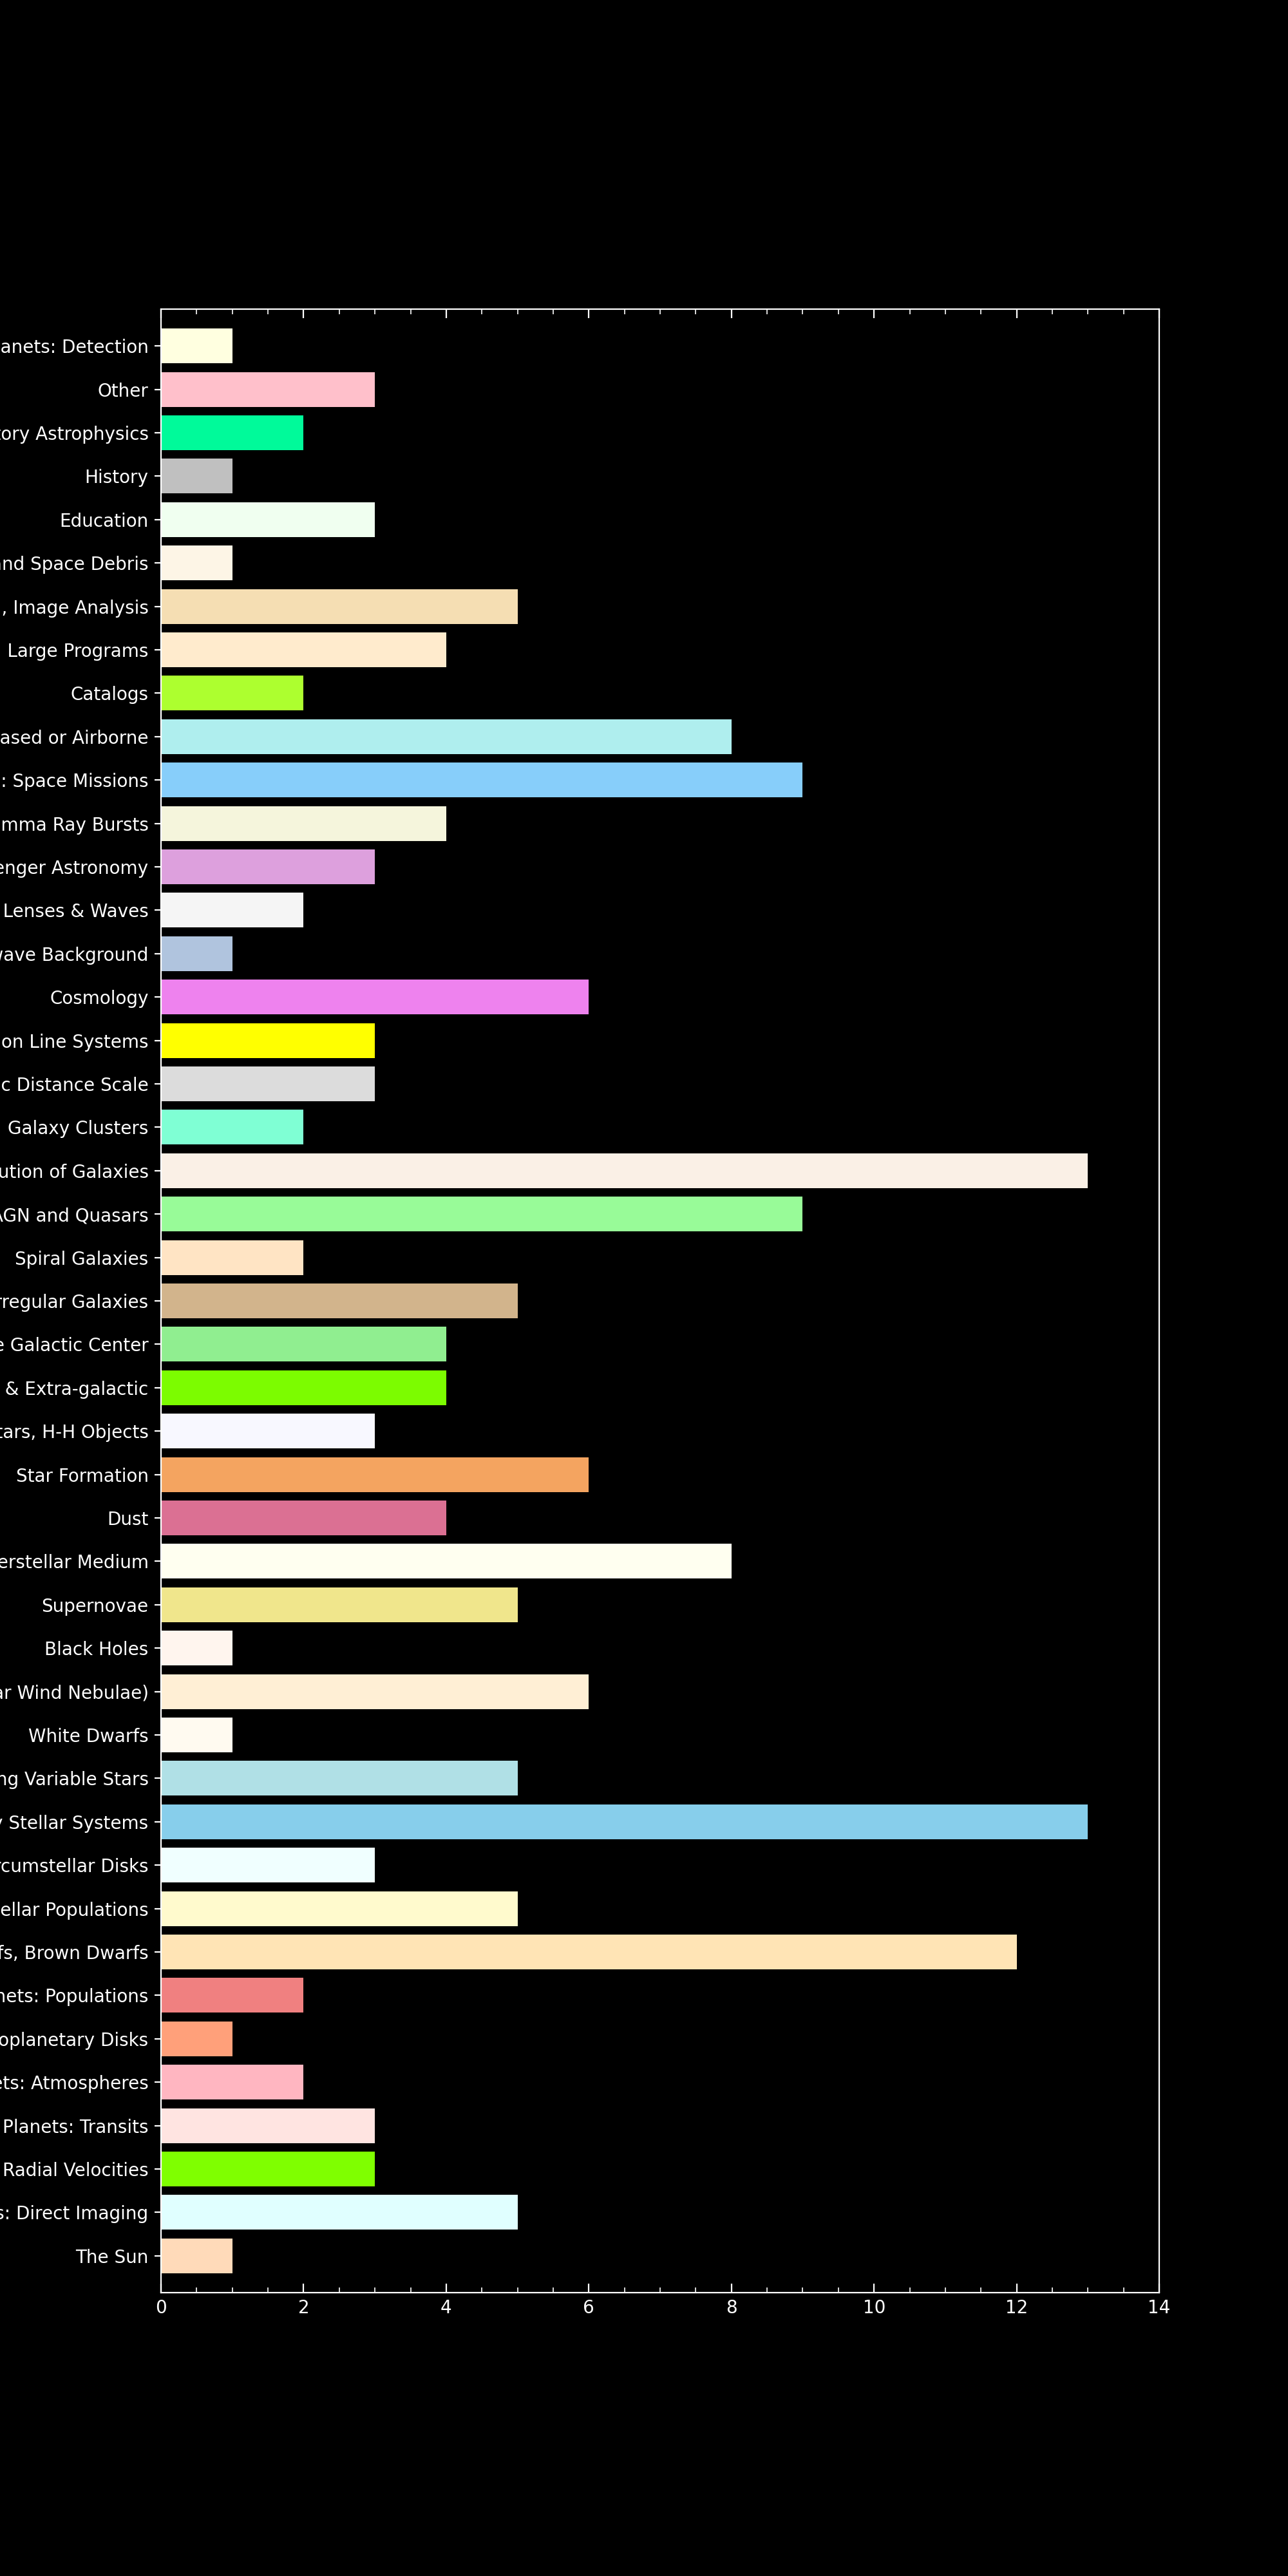

(0.0, 14.0)

In [20]:
fig,ax = plt.subplots(figsize=(10,20))
ax.barh(topics[DM!=0], DM[DM!=0], color=colors1)
ax.margins(y=0.01)
ax.minorticks_on()
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='y', which='minor', left=False)
ax.tick_params(axis='x',which='major',direction='in',length=5,labelsize=10)
ax.tick_params(axis='x',which='minor',direction='in',length=3,labelsize=10)
ax.set_xlim(0,14)
ax.set_xlabel(r'$N_{m DM}$',fontsize=12)
# plt.savefig('topics.pdf',transparent=True,bbox_inches='tight',dpi=300)